<a href="https://colab.research.google.com/github/ekaratnida/DADS5001-Data-Analytics-and-Data-Science-Tools-and-Programming/blob/main/09_Plotly/Week9_PK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week9

https://colab.research.google.com/drive/1u9UtBFgnJKxroV3h7XJw7JxbPaGuHGlL?usp=sharing

Reference
- https://pbpython.com/plotly-look.html
- https://www.kaggle.com/crawford/80-cereals >> data set
- http://seaborn.pydata.org/examples/index.html


In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns

df = pd.read_csv('https://github.com/chris1610/pbpython/blob/master/data/cereal_data.csv?raw=True')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,Top,1.0,0.33,68.40,1
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,Top,1.0,1.00,33.98,1
2,All-Bran,Kellogs,Cold,70,4,1,260,9.0,7.0,5,320,25,Top,1.0,0.33,59.43,1
3,All-Bran with Extra Fiber,Kellogs,Cold,50,4,0,140,14.0,8.0,0,330,25,Top,1.0,0.50,93.70,1
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,Top,1.0,0.75,34.38,1


In [ ]:
df.shape

(77, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
 16  cereal    77 non-null     int64  
dtypes: float64(5), int64(8), object(4)
memory usage: 10.4+ KB


In [ ]:
df['shelf'].unique()

array(['Top', 'Bottom', 'Middle'], dtype=object)

In [ ]:
fig = px.scatter(df,
                x='sugars',
                y='rating',
                hover_name='name',
                #hover_name= df['name'].astype(str)+" "+df['mfr'].astype(str),
                title='Cereal_ratingsvs.sugars')
fig.show()

In [ ]:
fig = px.box(df,
                x='sugars',
                y='rating',
                hover_name='name',
                title='Cereal ratings vs. sugars')
fig.show()

In [ ]:
fig = px.histogram(df, x='rating', title='Rating distribution')#,nbins=7)
fig.show()

AttributeError: ignored

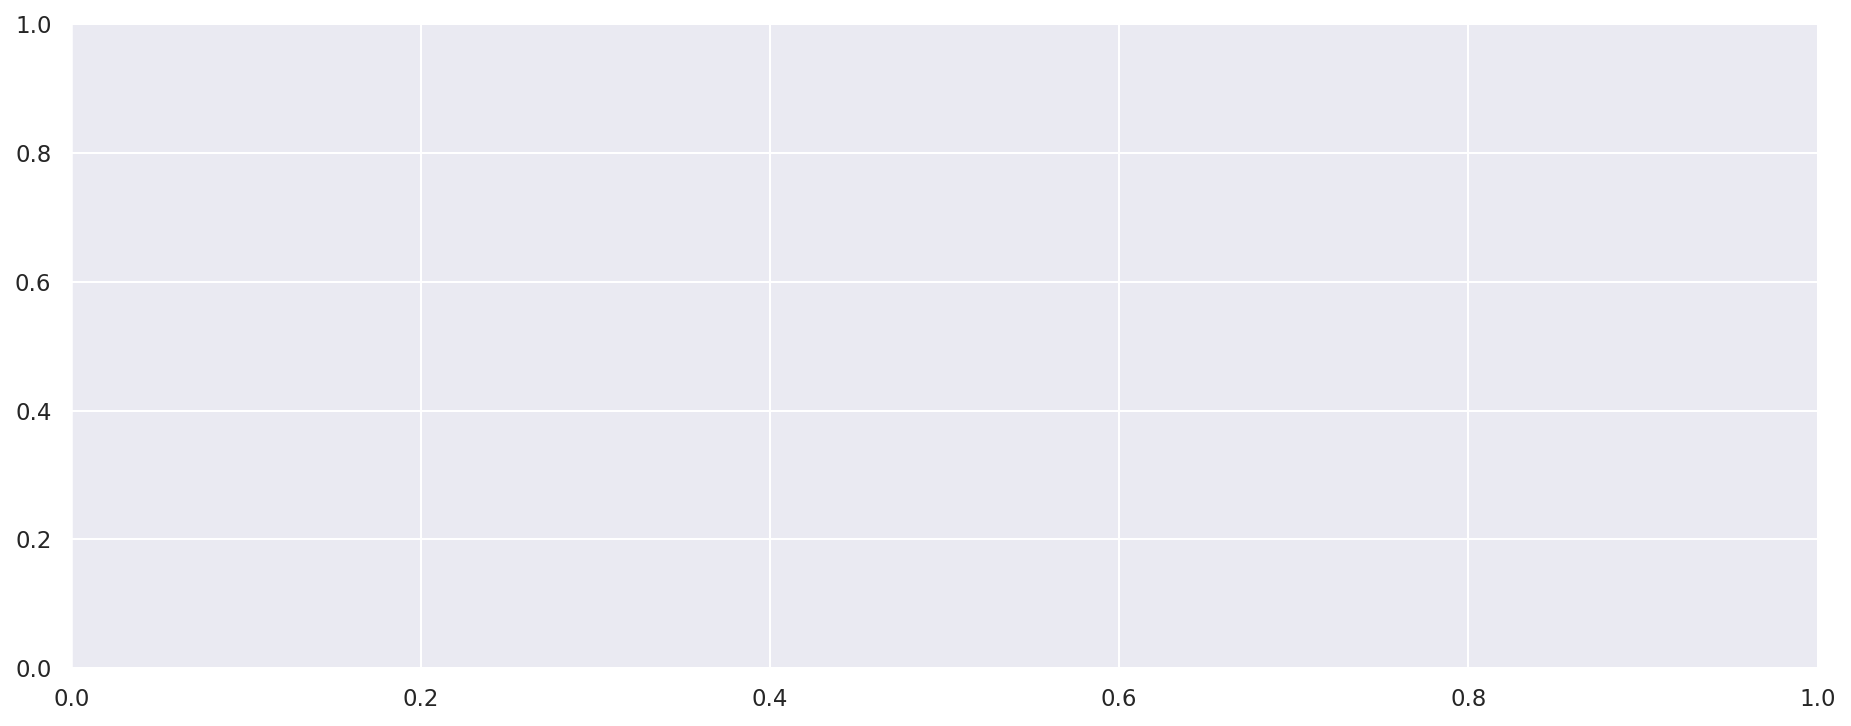

In [ ]:
sns.set(rc={'figure.dpi':150})
sns.displot( kind='hist',
             data=df,
             x='sugars',
             y='rating',
             hue='mfr',
             multiple='dodge',  # Approach to resolving multiple elements
                                # {'layer', 'dodge', 'stack', 'fill'} (default:'layer')
             height=5, aspect=2.5,
             alpha=0.6,
          )

In [ ]:
fig = px.scatter(df,
                x='sugars',
                y='rating',
                color='mfr',
                size='calories',
                facet_row='shelf',
                facet_col='type',
                hover_name='name',
                category_orders={'shelf': ['Top', 'Middle', 'Bottom']})
fig.show()
print(df.head())

                        name             mfr  type  calories  protein  fat  \
0                  100% Bran         Nabisco  Cold        70        4    1   
1          100% Natural Bran     Quaker Oats  Cold       120        3    5   
2                   All-Bran         Kellogs  Cold        70        4    1   
3  All-Bran with Extra Fiber         Kellogs  Cold        50        4    0   
4             Almond Delight  Ralston Purina  Cold       110        2    2   

   sodium  fiber  carbo  sugars  potass  vitamins shelf  weight  cups  rating  \
0     130   10.0    5.0       6     280        25   Top     1.0  0.33   68.40   
1      15    2.0    8.0       8     135         0   Top     1.0  1.00   33.98   
2     260    9.0    7.0       5     320        25   Top     1.0  0.33   59.43   
3     140   14.0    8.0       0     330        25   Top     1.0  0.50   93.70   
4     200    1.0   14.0       8      -1        25   Top     1.0  0.75   34.38   

   cereal  
0       1  
1       1  
2       

In [ ]:
fig = px.treemap(df, path=['mfr', 'shelf','calories'], values='cereal', title='Cereals by shelf location')   #title is information
fig.show()

In [ ]:
fig = px.sunburst(df, path=['mfr','calories','sugars'], values='cereal')
fig.show()